# House Price Indicator

### Life cycle of Machine Learning Project

* Understand the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem Statement
* This project understands how the price of houses are affected by other variables such as no. of bedrooms, no. of bathrooms, no. of floors etc.

## 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data
* The data consists of 21 columns and 21613 rows

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

Show Top 5 Records

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Converting date column type to date format

In [4]:
df.date=pd.to_datetime(df.date)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Drop id column

In [7]:
df.drop(columns='id', inplace=True)

Shape of the dataset

In [8]:
df.shape

(21613, 20)

### 2.2 Dataset Information

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 3) Data Checks to perform
* Check Missing Values
* Check Duplicates
* Check Data Types
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataset

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the dataset

### 3.3 Check Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

Converting no. of floors and no. of bathrooms into integers

In [12]:
df['floors'] = df['floors'].astype(int)

In [13]:
df['bathrooms']  = df['bathrooms'].astype(int)

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 3.4 Checking the number of unique values of each column

In [15]:
df.nunique()

date              372
price            4028
bedrooms           13
bathrooms           9
sqft_living      1038
sqft_lot         9782
floors              3
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

### 3.5 Check statistics of dataset

In [16]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [17]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
numerical_columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
categorical_columns = ['waterfront', 'view', 'condition', 'grade','zipcode','lat', 'long']
date_columns = ['date','yr_built','yr_renovated']

In [19]:
df[numerical_columns].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,9410.000000,4820.000000,6210.000000,871200.000000


### Insight
* From above description of numerical data, mean price of a house is 5.400881e+05, mean number of bedrooms per house is approximately 3. mean number of bathrooms per house is approximately 1. mean square feets of a house is 2079. Mean square feets of the landspace is 1.510697e+04. Approximately there is only one floor in a house. Mean square footages of the interior housing space that is above ground level is 1788.390691. Mean square footages of the interior housing space that is below gound level is 291.509045. The mean square footage of interior housing living space for the nearest 15 neighbors is 1986.552492. The mean square footage of the land lots of the nearest 15 neighbors is 12768.455652.
* There are some houses with 0 bedrooms and 0 bathrooms. 
	

### 3.7 Exploring Data

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
df[categorical_columns]

,waterfront,view,condition,grade,zipcode,lat,long
0,0,0,3,7,98178,47.5112,-122.257
1,0,0,3,7,98125,47.7210,-122.319
2,0,0,3,6,98028,47.7379,-122.233
3,0,0,5,7,98136,47.5208,-122.393
4,0,0,3,8,98074,47.6168,-122.045
...,...,...,...,...,...,...,...
21608,0,0,3,8,98103,47.6993,-122.346
21609,0,0,3,8,98146,47.5107,-122.362
21610,0,0,3,7,98144,47.5944,-122.299
21611,0,0,3,8,98027,47.5345,-122.069


In [22]:
print("Categories in 'waterfront' variable: ",end=" ")
print(df['waterfront'].unique())

print("Categories in 'view' variable: ",end=" ")
print(df['view'].unique())

print("Categories in 'condition' variable: ",end=" ")
print(df['condition'].unique())

print("Categories in 'grade' variable: ",end=" ")
print(df['grade'].unique())

Categories in 'waterfront' variable:  [0 1]
Categories in 'view' variable:  [0 3 4 2 1]
Categories in 'condition' variable:  [3 5 4 1 2]
Categories in 'grade' variable:  [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [23]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [24]:
df[categorical_columns] = df[categorical_columns].astype(object)

In [25]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                      object
long                     object
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [26]:
print("We have {} numerical features : {}".format(len(numerical_columns),numerical_columns))
print("\nWe have {} categorical features : {}".format(len(categorical_columns),categorical_columns
                                                      ))

We have 10 numerical features : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

We have 7 categorical features : ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long']


In [27]:
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print("{} has below values with counts".format(column))
    print(value_counts)

waterfront has below values with counts
waterfront
0    21450
1      163
Name: count, dtype: int64
view has below values with counts
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64
condition has below values with counts
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64
grade has below values with counts
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
zipcode has below values with counts
zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64
lat has below values with counts
lat
47.5322    17
47.6624    17
47.6846    17
47.5491    17
47.6955    16
           ..
47.3529     1
47.4717     1
47.2012     1
47.2775     1
47.3886     1
Name: count, Length: 5034, dtype: i

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 4) Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion
* Histogram
* Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

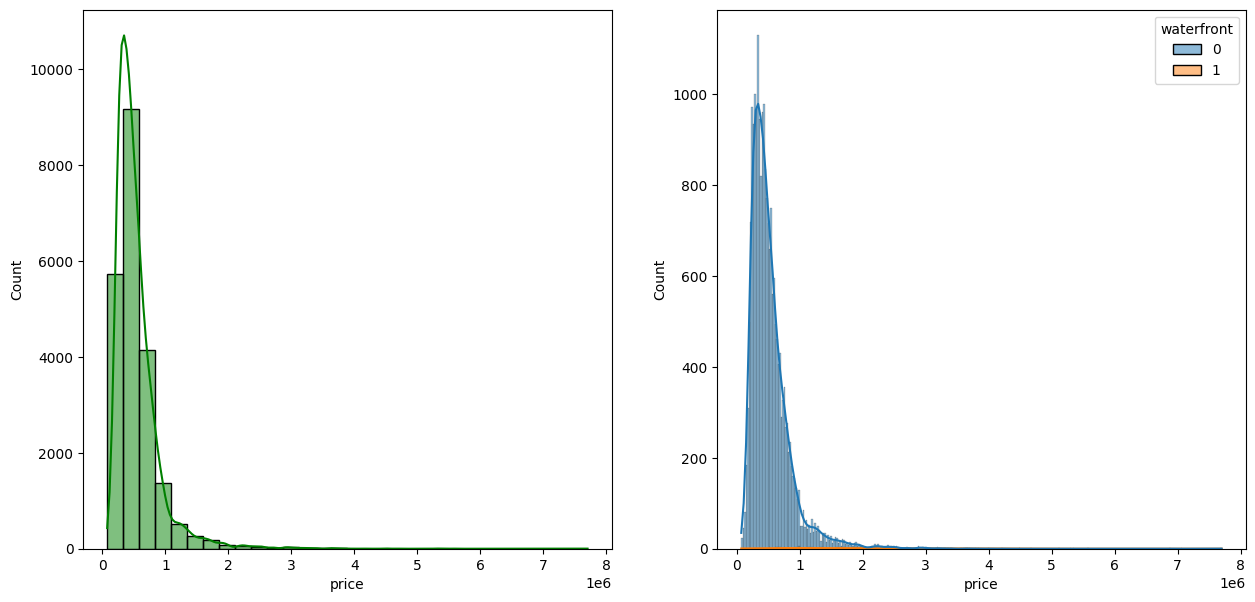

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='waterfront')
plt.show()

* Most of the available houses for sale are below 1000000 dollars.
* Most of the houses don't have a waterfront

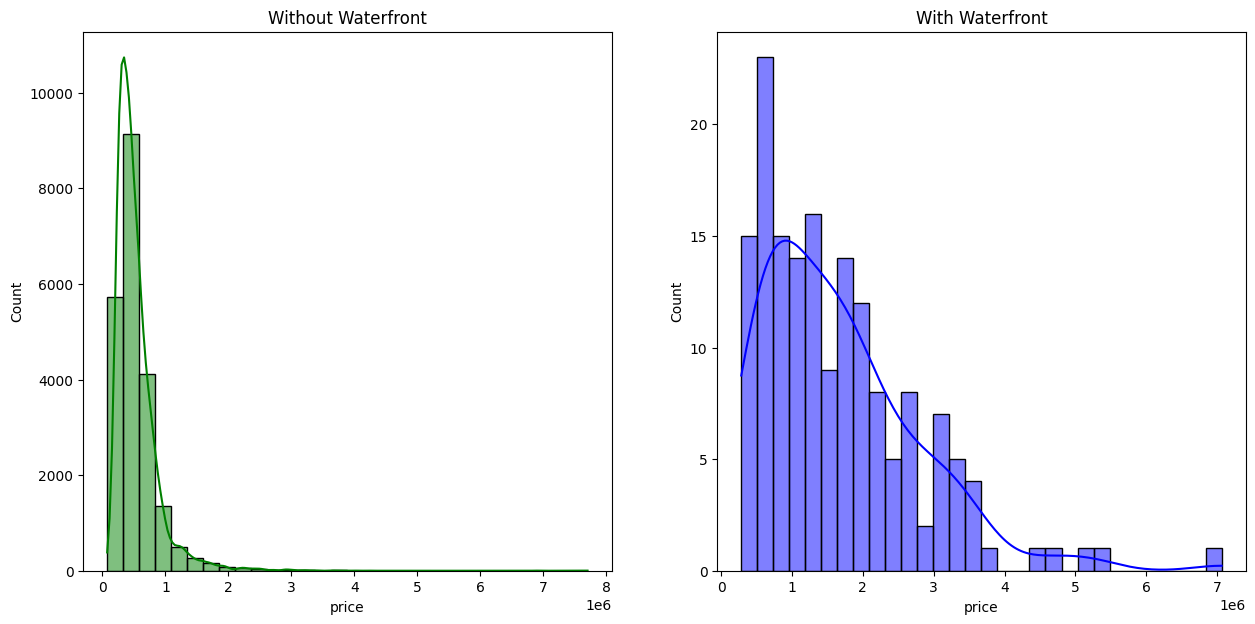

In [30]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df[df['waterfront']==0],x='price',bins=30,kde=True,color='g').set(title='Without Waterfront')
plt.subplot(122)
sns.histplot(data=df[df['waterfront']==1],x='price',bins=30,kde=True,color='b').set(title="With Waterfront")
plt.show()

* As mentioned above, most of the houses available for sale without waterfront are below 1000000.
* Prices of houses with waterfronts vary somewhat compared to those without waterfronts.

### 4.2 Maximum rooms in houses 

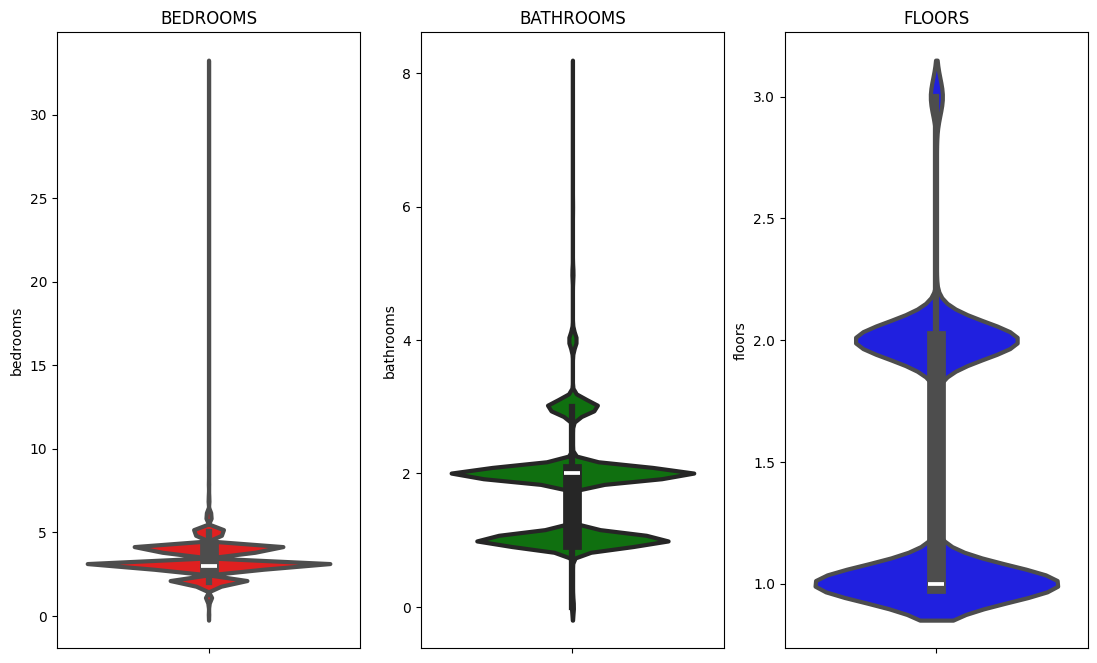

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('BEDROOMS')
sns.violinplot(y='bedrooms',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('BATHROOMS')
sns.violinplot(y='bathrooms',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('FLOORS')
sns.violinplot(y='floors',data=df,color='blue',linewidth=3)
plt.show()

* From the above three plots, it is clearly visible that most houses have 2-5 bedrooms, while most have 2 bathrooms and 1 floor.

### 4.3 Multivariate analysis using pieplot

In [32]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

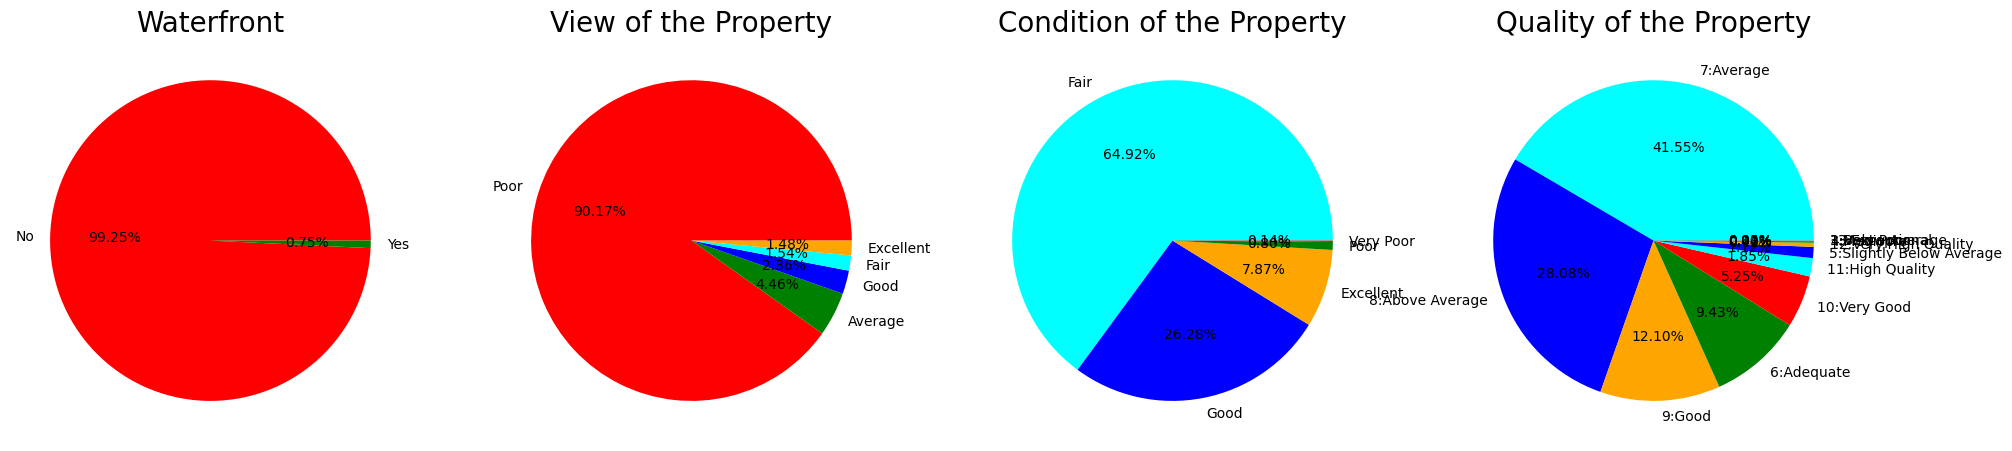

In [33]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['waterfront'].value_counts()
labels = 'No', 'Yes'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Waterfront', fontsize = 20)
plt.axis('off') #Turn off the axis lines

plt.subplot(1, 5, 2)
size = df['view'].value_counts()
labels = 'Poor', 'Average','Good','Fair','Excellent'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('View of the Property', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['condition'].value_counts()
labels = 'Fair', 'Good','Excellent','Poor','Very Poor'
color = ['cyan', 'blue', 'orange', 'green','red']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Condition of the Property', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['grade'].value_counts()
labels = '7:Average', '8:Above Average','9:Good','6:Adequate','10:Very Good','11:High Quality','5:Slightly Below Average','12:Very High Quality','4:Mediocre','13:Exceptional','3:Below Average','1:Very Poor'
# color = ['cyan', 'blue', 'orange', 'green','red']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Quality of the Property', fontsize = 20)
plt.axis('off')

* Most of the houses don't have waterfronts.
* 90.17% of houses have poor view of the property.
* Most of the houses have fair condition of the property.
* Most of the houses are average or above average when considering the quality.

### 4.4 Bivariate Analysis using Scatter Plot

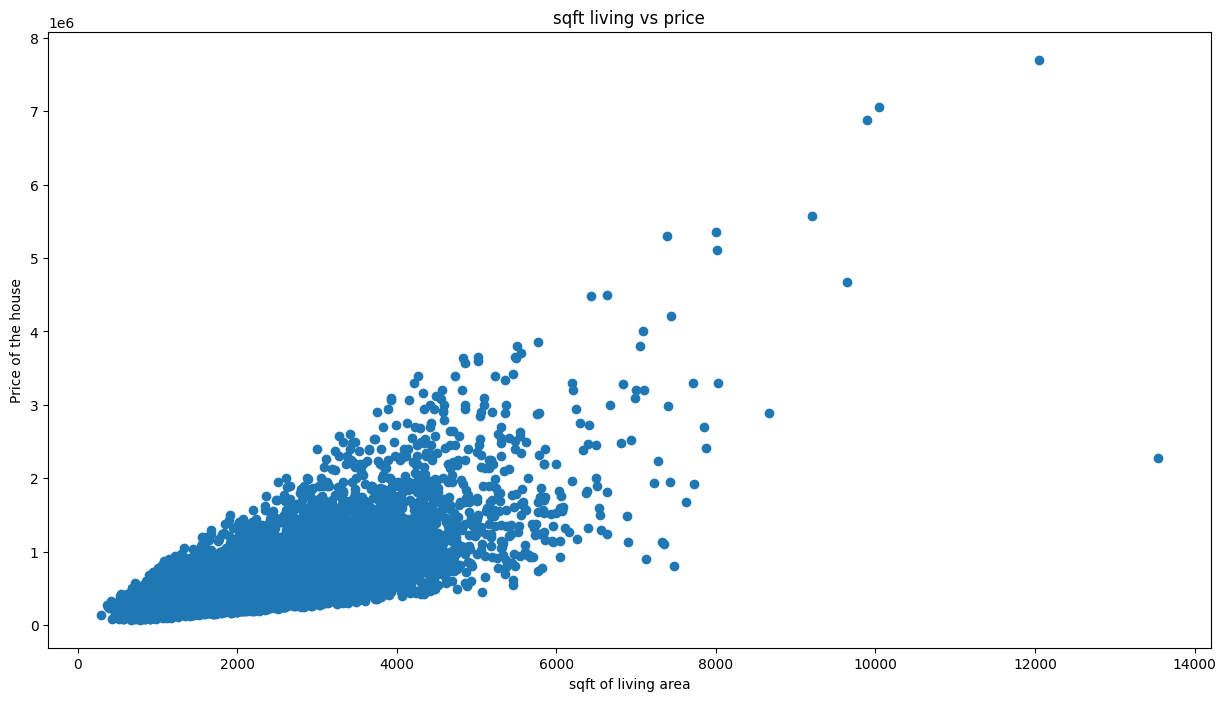

In [34]:
plt.figure(figsize=(15,8))
plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('sqft of living area')
plt.ylabel('Price of the house')
plt.title('sqft living vs price')
plt.show()

Most of the houses priced below 3,000,000 have a living area of less than 6,000 square feet. There is no perfect correlation between the price of houses and the amount of living area.

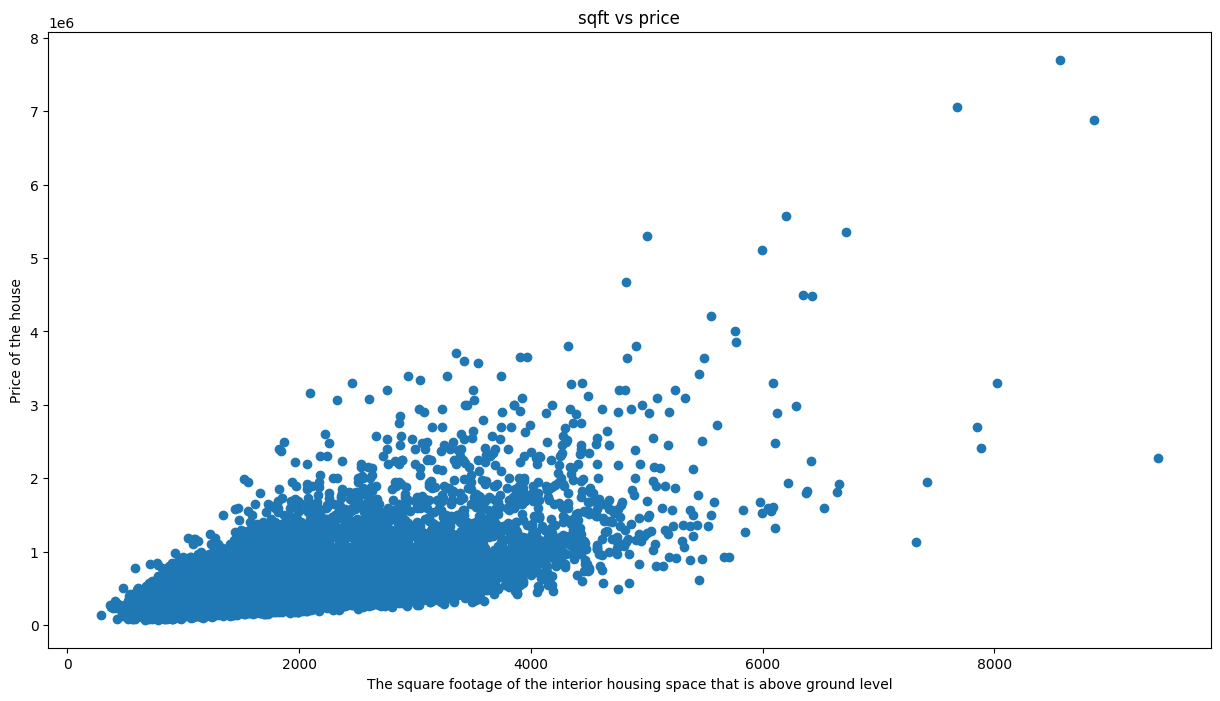

In [35]:
plt.figure(figsize=(15,8))
plt.scatter(df['sqft_above'],df['price'])
plt.xlabel('The square footage of the interior housing space that is above ground level')
plt.ylabel('Price of the house')
plt.title('sqft vs price')
plt.show()

Most of the houses priced below 3,000,000 have interior space above ground level that is less than 5,000 square feet. There is no perfect correlation between the price of houses and their interior space.

### 4.5 Locations of Houses for Sale

In [39]:
fig = px.scatter_geo(df, 
                     lat='lat', 
                     lon='long', 
                     color='price', 
                     hover_name='price',
                     projection='natural earth')

fig.show()


According to the plot above, most of the houses for sale are below 1 million.